<a href="https://colab.research.google.com/github/Modinat-A/Seq2Seq/blob/main/Data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import json
import py
from collections import Counter
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [6]:
# load training data and merge
file_name = open('train_spider.json')
train_data = pd.read_json(file_name)

# load testing data
file_name = open('dev.json')
test_data = pd.read_json(file_name)


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   db_id                7000 non-null   object
 1   query                7000 non-null   object
 2   query_toks           7000 non-null   object
 3   query_toks_no_value  7000 non-null   object
 4   question             7000 non-null   object
 5   question_toks        7000 non-null   object
 6   sql                  7000 non-null   object
dtypes: object(7)
memory usage: 382.9+ KB


In [9]:
train_data.head(5)

,db_id,query,query_toks,query_toks_no_value,question,question_toks,sql
0,department_management,SELECT count(*) FROM head WHERE age > 56,"[SELECT, count, (, *, ), FROM, head, WHERE, ag...","[select, count, (, *, ), from, head, where, ag...",How many heads of the departments are older th...,"[How, many, heads, of, the, departments, are, ...","{'from': {'table_units': [['table_unit', 1]], ..."
1,department_management,"SELECT name , born_state , age FROM head ORD...","[SELECT, name, ,, born_state, ,, age, FROM, he...","[select, name, ,, born_state, ,, age, from, he...","List the name, born state and age of the heads...","[List, the, name, ,, born, state, and, age, of...","{'from': {'table_units': [['table_unit', 1]], ..."
2,department_management,"SELECT creation , name , budget_in_billions ...","[SELECT, creation, ,, name, ,, budget_in_billi...","[select, creation, ,, name, ,, budget_in_billi...","List the creation year, name and budget of eac...","[List, the, creation, year, ,, name, and, budg...","{'from': {'table_units': [['table_unit', 0]], ..."
3,department_management,"SELECT max(budget_in_billions) , min(budget_i...","[SELECT, max, (, budget_in_billions, ), ,, min...","[select, max, (, budget_in_billions, ), ,, min...",What are the maximum and minimum budget of the...,"[What, are, the, maximum, and, minimum, budget...","{'from': {'table_units': [['table_unit', 0]], ..."
4,department_management,SELECT avg(num_employees) FROM department WHER...,"[SELECT, avg, (, num_employees, ), FROM, depar...","[select, avg, (, num_employees, ), from, depar...",What is the average number of employees of the...,"[What, is, the, average, number, of, employees...","{'from': {'table_units': [['table_unit', 0]], ..."


In [10]:
file_name = open('train_others.json')
odata = pd.read_json(file_name)

In [11]:
# Get number of distinct tables to see the range 
print('Number of tables',len(set(train_data['db_id'].values)))
print('Number of tables',len(set(test_data['db_id'].values)))


Number of tables 140
Number of tables 20


In [95]:
words = []
queries = []
for i in train_data.iterrows():
    _,row = i
    nl_input = row['question_toks']
    words.extend(nl_input)
    nl_output = row['query_toks']
    queries.extend(nl_output)

# get size of the vocabulary
in_voc_size = len(set(words))
print("Number of unique question tokens:", len(set(words)))
print("Number of unique query tokens:", len(set(queries)))

# 
max_length_questions = max([len(txt) for txt in words])
max_length_query = max([len(txt) for txt in queries])
print("Maximum length of unique question tokens:", max_length_questions)
print("Maximum length of unique query tokens:", max_length_query)

Number of unique question tokens: 3401
Number of unique query tokens: 4827
Maximum length of unique question tokens: 18
Maximum length of unique query tokens: 47


In [70]:
#The average question length and SQL length
query_length = train_data['query_toks'].apply(len).values
question_length = train_data['question_toks'].apply(len).values
print(np.average(query_length))
print(np.average(question_length))

18.493285714285715
14.182285714285713


In [64]:
# the most keywords in the query 
c_words= Counter(queries)
c_words = dict(c_words)
df = pd.DataFrame.from_dict(data=c_words,orient='index')
df.reset_index(inplace=True)
df.columns = ['Keyword','Count']

# Number of queries with complex sql key words
df= df[df['Keyword'].isin(['WHERE','HAVING', 'ORDER BY', 'LIMIT', 'JOIN', 'INTERSECT', 'EXCEPT', 'UNION' , 'OR', 'AND', 'EXISTS', 'LIKE'])]
df

,Keyword,Count
26,AND,679
36,JOIN,3793
48,HAVING,440
51,LIMIT,1109
65,INTERSECT,250
69,LIKE,176
101,OR,208
157,UNION,67
230,EXCEPT,209


In [62]:
df.drop(columns='db_id',inplace=True)

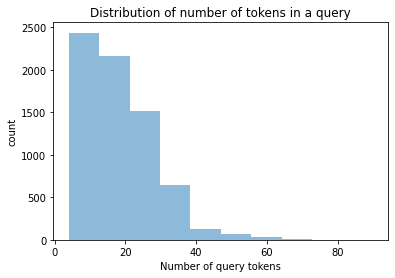

In [99]:
data = query_length
plt.hist(data, bins=10, alpha=0.5)
plt.title('Distribution of number of tokens in a query')
plt.xlabel('Number of query tokens')
plt.ylabel('count')

plt.show()

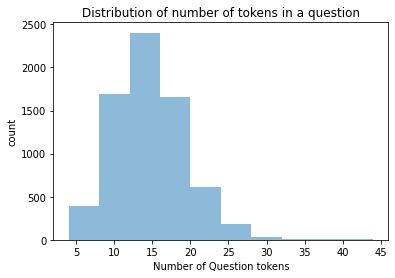

In [100]:
data = question_length
plt.hist(data, bins=10, alpha=0.5)
plt.title('Distribution of number of tokens in a question')
plt.xlabel('Number of Question tokens')
plt.ylabel('count')

plt.show()

In [102]:
tokenizer = Tokenizer(num_words= in_voc_size, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True)
tokenizer.fit_on_texts(train_data['question'])

print("Count of characters:",tokenizer.word_counts)
print("Length of text:",tokenizer.document_count)
print("Character index",tokenizer.word_index)
print("Frequency of characters:",tokenizer.word_docs)


Count of characters: OrderedDict([('how', 821), ('many', 798), ('heads', 8), ('of', 5428), ('the', 9959), ('departments', 67), ('are', 2471), ('older', 34), ('than', 716), ('56', 1), ('list', 635), ('name', 1536), ('born', 7), ('state', 85), ('and', 2569), ('age', 149), ('ordered', 162), ('by', 618), ('creation', 5), ('year', 195), ('budget', 43), ('each', 694), ('department', 213), ('what', 2672), ('maximum', 159), ('minimum', 103), ('is', 1525), ('average', 518), ('number', 1182), ('employees', 205), ('whose', 363), ('rank', 50), ('between', 73), ('10', 64), ('15', 13), ('names', 1553), ('who', 938), ('outside', 2), ('california', 7), ('distinct', 245), ('years', 63), ('managed', 7), ('a', 497), ('secretary', 11), ('in', 1810), ("'alabama'", 1), ('states', 54), ('where', 68), ('at', 248), ('least', 237), ('3', 116), ('were', 103), ('which', 625), ('most', 600), ('established', 1), ('show', 815), ('for', 1073), ('temporary', 1), ('acting', 3), ('value', 37), ("'yes'", 2), ('statuses',